In [ ]:
! python -m pip install -U matplotlib

In [ ]:
! pip install pyyaml h5py

In [ ]:
! git clone https://github.com/sameerbairwa/ANPR

In [1]:
cd /Users/nebula/Desktop/company/roboflow/licencePlate/ANPR

/Users/nebula/Desktop/company/roboflow/licencePlate/ANPR


In [2]:
import re

def natural_sort_key(s, _nsre=re.compile('([0-9]+)')):
    return [
        int(text)
        if text.isdigit() else text.lower()
        for text in _nsre.split(s)]

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob

In [4]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def preprocess_image(path):
    img = cv2.imread(path)
    # converting BGR to RGB
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #normalise to 0 to 1
    pixels = image_rgb.astype('float32')
    pixels /= 255.0
    # image_rgb = image_rgb.resize((224, 224))
    return pixels

In [6]:
import os
def toSave(t_imagePath,f_name): 
  # directory= '/content/drive/MyDrive/Project/detectCrop/imagesCar/numberPlate/'
    def get_plate(image_path, Dmax=610, Dmin=258):
        vehicle = preprocess_image(image_path)
        ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
        side = int(ratio * Dmin)
        bound_dim = min(side, Dmax)
        _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
        return LpImg, cor# Obtain plate image and its coordinates from an image
    test_image = t_imagePath
#     while True:
#         if get_plate(test_image) ==True:
            
    LpImg,cor = get_plate(test_image)
#     if LpImg == True:
    print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
    print("Coordinate of plate(s) in image: \n", cor)# Visualize our result
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.axis(False)
    plt.imshow(preprocess_image(test_image))
    plt.subplot(1,2,2)
    plt.axis(False)
    plt.imshow(LpImg[0])
    # plt.savefig("/content/drive/MyDrive/Project/detectCrop/imagesCar/numberPlate/part_result_29.jpg",dpi=300)
    os.chdir(directory)
    filename = f_name
    crop_img = np.array(255*LpImg[0], dtype = 'uint8')
    #cv2_imshow(crop_img)
    cv2.imwrite(filename,crop_img)
#         else:
#             continue 

In [7]:
def detect(file,filename):
        try:
            toSave(file,filename)
        except:
            pass

/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/0.jpg
Detect 1 plate(s) in 0
Coordinate of plate(s) in image: 
 [array([[273.80190608, 393.88356235, 390.08536868, 270.00371241],
       [786.11873154, 794.60097335, 828.10437578, 819.62213397],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/1.jpg
Detect 1 plate(s) in 1
Coordinate of plate(s) in image: 
 [array([[241.95836851, 363.1570435 , 362.65570161, 241.45702663],
       [791.43078108, 798.31280862, 839.42972154, 832.547694  ],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/2.jpg
/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/3.jpg
Detect 1 plate(s) in 3
Coordinate of plate(s) in image: 
 [array([[175.52536251, 301.96205229, 300.4057639 , 173.96907412],
       [813.51569987, 822.45668601, 859.46596674, 850.52498061],
   

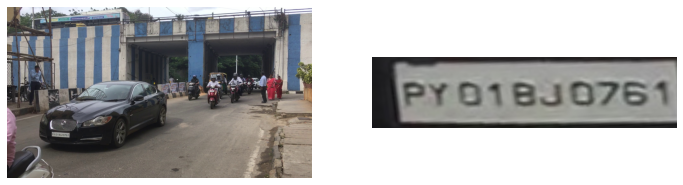

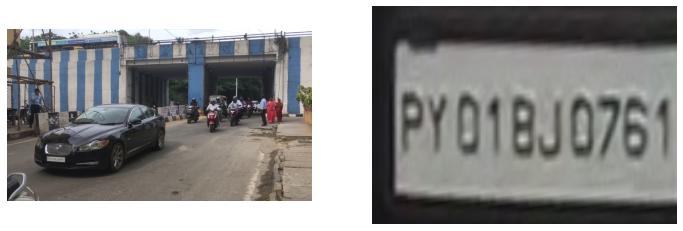

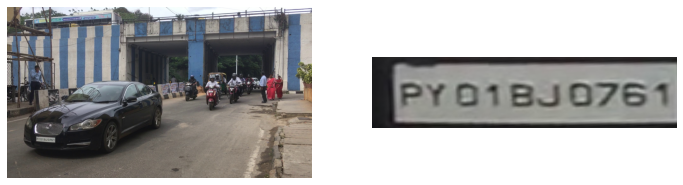

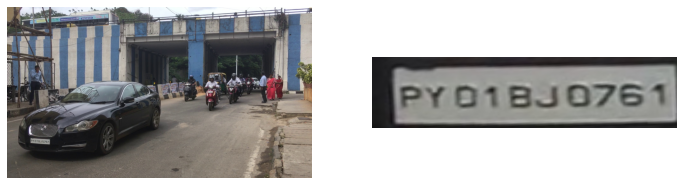

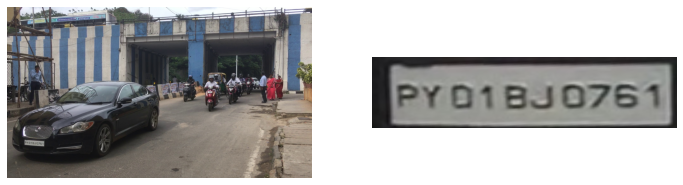

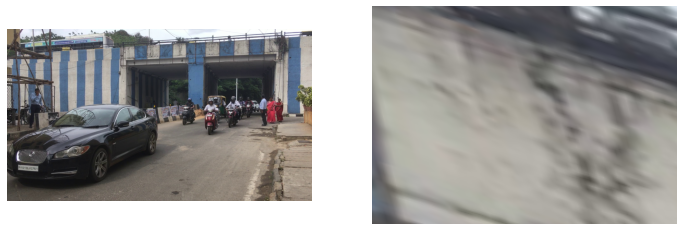

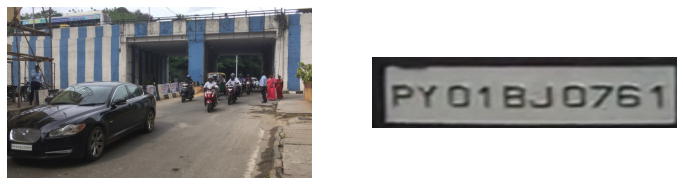

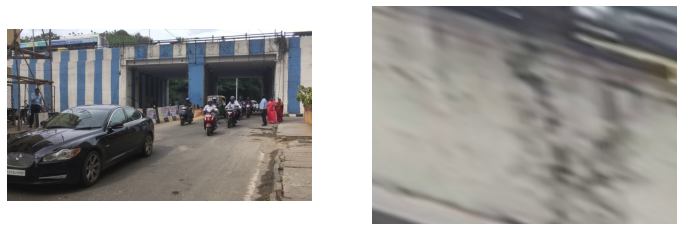

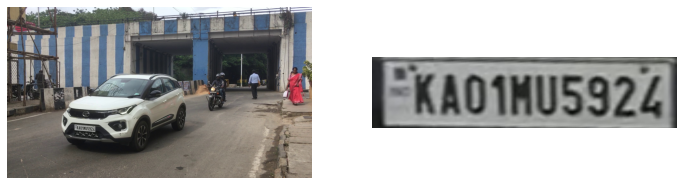

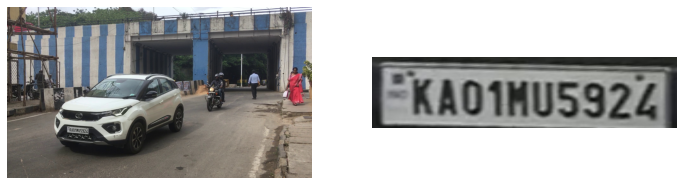

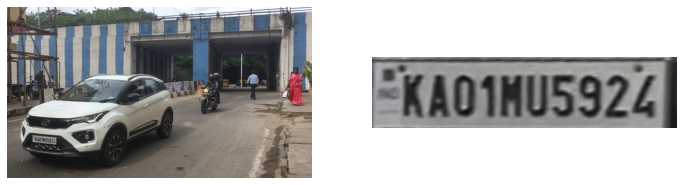

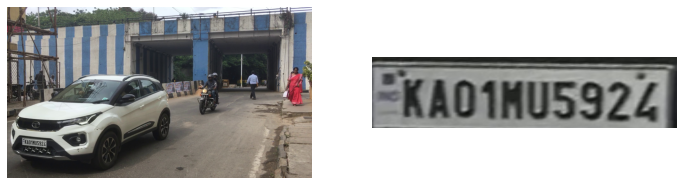

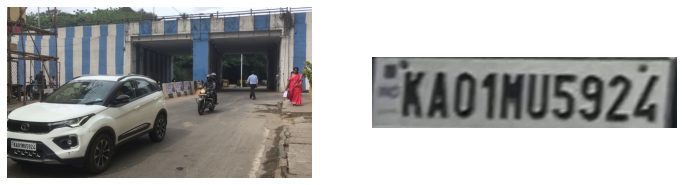

In [8]:
import os
import numpy as np
import glob
import cv2
#from google.colab.patches import cv2_imshow

directory = r'/Users/nebula/Desktop/company/roboflow/licencePlate/onPlate/'
count = 0
for file in sorted(glob.glob("/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/*.jpg"),key=natural_sort_key):
    # img=cv2.imread(file)
    os.chdir(directory)
    print(file)
    # blur_image = cv2.GaussianBlur(img, (11,11),0)
    filename = '00'+str(count)+'.jpg'
    detect(file,filename)
#     toSave(file,filename)
#     cv2.imwrite(filename, result)
    count= count+1

In [9]:
cd /Users/nebula/Desktop/company/roboflow/licencePlate/ANPR

/Users/nebula/Desktop/company/roboflow/licencePlate/ANPR


In [36]:
import numpy as np
import cv2

# Match contours to license plate or character template
def find_contours(dimensions, img,cnt) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
#     print(cnt)
    ii = cv2.imread('./contourImg/contour'+str(cnt)+'.jpg')
#     print(ii)
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

#             Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [37]:
# Find characters in the resulting images
def segment_characters(image,cnt) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('./contourImg/contour'+str(cnt)+'.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp,cnt)

    return char_list,len(char_list)


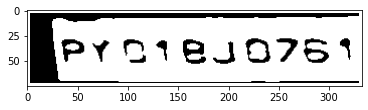

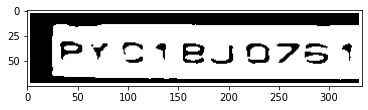

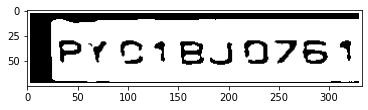

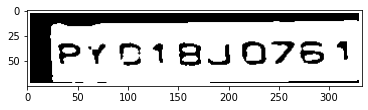

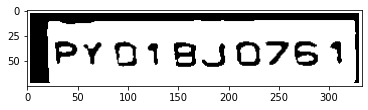

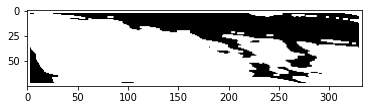

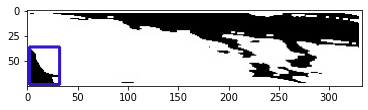

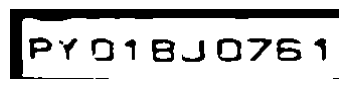

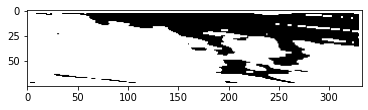

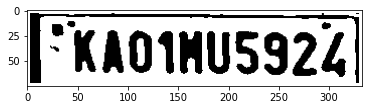

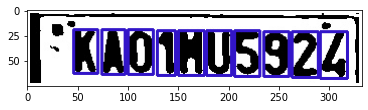

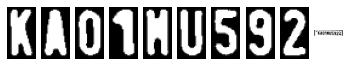

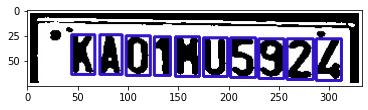

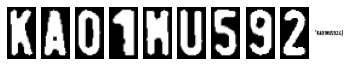

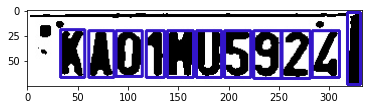

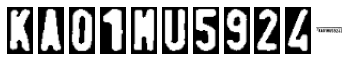

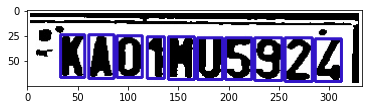

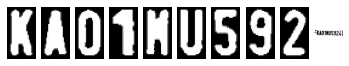

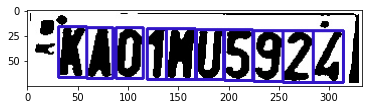

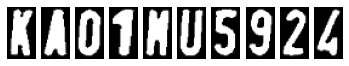

In [12]:
cnt=0

for file in sorted(glob.glob('/Users/nebula/Desktop/company/roboflow/licencePlate/onPlate/*.jpg'),key=natural_sort_key):
    img = cv2.imread(file)
    char,k = segment_characters(img,cnt)
    for i in range(k):
        plt.subplot(1, k, i+1)
#         print(char[i])
        plt.imshow(char[i], cmap='gray')
        plt.axis('off')
#     cv2.imwrite('./contourImg/'+str(cnt)+'saveImg.jpg',char[i])
    cnt=cnt+1
  

### Model for characters

In [5]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [6]:
cd /Users/nebula/Desktop/company/roboflow/licencePlate

/Users/nebula/Desktop/company/roboflow/licencePlate


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
        'data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28        batch_size=1,
        class_mode='categorical')

Found 932 images belonging to 36 classes.
Found 265 images belonging to 36 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

In [50]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

In [51]:
class stop_training_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc') is not None and logs.get('val_acc') >= DESIRED_ACCURACY):
            self.model.stop_training = True

In [52]:
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [53]:
batch_size = 1
callbacks = [tensorboard_callback, stop_training_callback()]
model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 100, callbacks=callbacks)
# model.save('license_plate.pt')

Epoch 1/100
932/932 [==============================] - 8s 9ms/step - loss: 3.5104 - accuracy: 0.0794 - val_loss: 3.3258 - val_accuracy: 0.2189
Epoch 2/100
932/932 [==============================] - 8s 8ms/step - loss: 3.0928 - accuracy: 0.2092
Epoch 3/100
932/932 [==============================] - 8s 8ms/step - loss: 2.4326 - accuracy: 0.3895
Epoch 4/100
932/932 [==============================] - 7s 8ms/step - loss: 1.8841 - accuracy: 0.4893
Epoch 5/100
932/932 [==============================] - 7s 8ms/step - loss: 1.5482 - accuracy: 0.5815
Epoch 6/100
932/932 [==============================] - 7s 8ms/step - loss: 1.3261 - accuracy: 0.6384
Epoch 7/100
932/932 [==============================] - 7s 8ms/step - loss: 1.1345 - accuracy: 0.6985
Epoch 8/100
932/932 [==============================] - 7s 8ms/step - loss: 1.0324 - accuracy: 0.7082
Epoch 9/100
932/932 [==============================] - 8s 8ms/step - loss: 0.9235 - accuracy: 0.7403
Epoch 10/100
932/932 [===========================

In [ ]:
model.save('/Users/nebula/Desktop/company/roboflow/licencePlate/license_plate.h5')

In [ ]:
# !kill 8400
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [21]:
cd /Users/nebula/Desktop/company/roboflow/licencePlate/ANPR

/Users/nebula/Desktop/company/roboflow/licencePlate/ANPR


In [135]:
df = []

In [ ]:
import os
t='KA01WU5924I'
file='/Users/nebula/Desktop/company/roboflow/licencePlate/onPlate/0038.jpg'
_,tail=os.path.split(file)
print(int(os.path.splitext(tail)[0]))

cnt = 38
# create_dataframe(file,t,cnt)

In [136]:
import cv2
count_b = 0
def video_cnt(count_b):
    for file in glob.glob('/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7/*.jpg'):
        count_b += 1
#     cap = cv2.VideoCapture("/Users/nebula/Desktop/company/roboflow/licencePlate/Vehicle_Detection/Vehicle_Detection_4.mp4")
#     length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print(count_b)
    for i in range(count_b):
        c_cnt.append(i)
    return(c_cnt)

In [139]:
def create_dataframe(file,t,c_cnt):
    _,tail=os.path.split(file)
    f_name=os.path.splitext(tail)[0]
#     print(f_name)
    for i in c_cnt:
#         print(f_name)
        if int(f_name) == c_cnt[i]:
            df.append(t)
            break
        else:
            continue 
#     if b not in c_cnt:
#         df.append('')

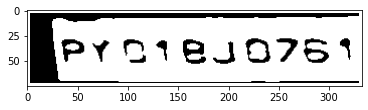

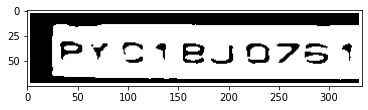

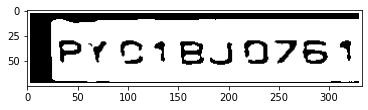

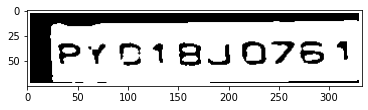

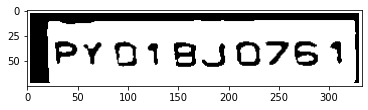

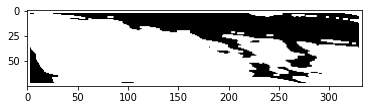

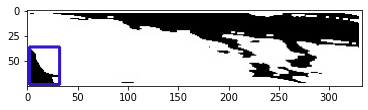

L


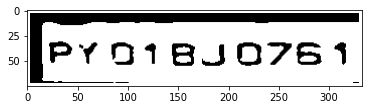

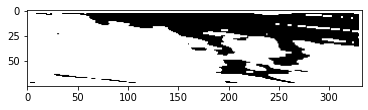

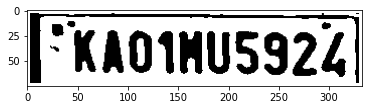

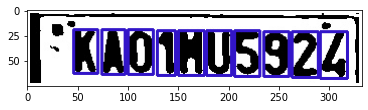

KA01RU5924


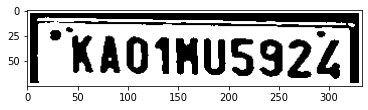

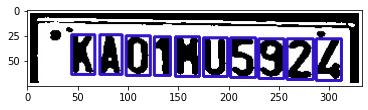

KA01MU5924


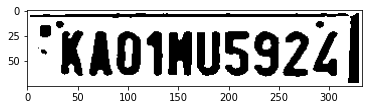

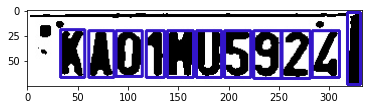

KA01WU5924I


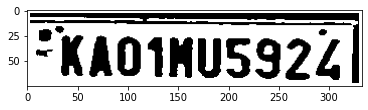

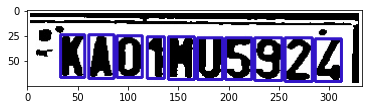

KA01WU5924


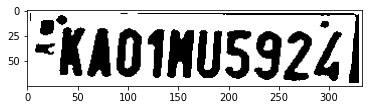

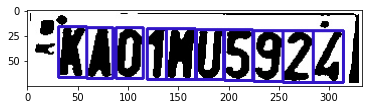

KA01WU5924


In [140]:
import os
import numpy as np
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results(char):
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c
    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (28,28))
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) #preparing image for the model
        y_ = model.predict(img)#predicting the class
        classes_y=np.argmax(y_,axis=1)
#         print(classes_y[0])
        character = dic[classes_y[0]] #
        output.append(character) #storing the result in a list
        
#     plate_number = ''.join(output)
    plate_number = ''.join(str(v) for v in output)
    
    return plate_number

t=[]
c_cnt = []
# c_cnt=0
# length=0
c_cnt = video_cnt(count_b)
for file in sorted(glob.glob('/Users/nebula/Desktop/company/roboflow/licencePlate/onPlate/*.jpg'),key=natural_sort_key):
        img = cv2.imread(file)
        char,k = segment_characters(img,cnt)
        t=show_results(char)
        
        create_dataframe(file,t,c_cnt)
#         if p!=None:
# #             print(p)
#             while df[p] != np.nan:
# #                 print(p)
#                 df.append('')
#                 break
            
#         c_cnt += 1
#         df.append(t)
        print(show_results(char))

In [48]:
c_cnt

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [141]:
df

['',
 '',
 '',
 '',
 '',
 'L',
 '',
 '',
 'KA01RU5924',
 'KA01MU5924',
 'KA01WU5924I',
 'KA01WU5924',
 'KA01WU5924']

In [58]:
import pandas as pd
df_ = pd.DataFrame(df,columns=['predict'])

In [59]:
df_.to_csv('licensePlate.csv')

In [ ]:
ext2 = 'Predicted Values: '+ t
print(ext2)

In [ ]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.text(-92, -45, ext2, size=20, color='black')
plt.show()

In [60]:
data1=pd.read_csv('/Users/nebula/Desktop/company/roboflow/licencePlate/ANPR/licensePlate.csv')
path = r'/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/saveFile'
directory = r'/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t7'
filename= glob.glob(os.path.join(directory,'*.jpg'))
i=0
for file in sorted(filename,key=natural_sort_key):
    plt.clf()
    filename = (os.path.join(path,str(i) +'.png'))
#     print(file)
    ext1 = 'LP:'+ str(data1.predict[i])
    image=cv2.imread(file)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.text(50, 100, ext1, size=10, color='white')
#     filena=np.array(image/255, dtype = 'uint8')
    plt.imshow(rgb,cmap='gray')
    plt.axis('off')
    
#     cv2.putText(img=img, text='Hello', org=(150, 250), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)
    
    
    plt.savefig(filename,bbox_inches='tight',dpi=300)
    plt.close()
    i = i + 1

KeyError: 13

<Figure size 432x288 with 0 Axes>

In [ ]:
image = cv2.imread('/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/t5/2.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# filena=np.array(image, dtype = 'uint8')
plt.text(150, 40, 'Hello', size=10, color='white')
# cv2.putText(img=img, text='Hello', org=(0, 20), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)
# plt.axis('off')
plt.imshow(rgb,cmap='gray')
plt.axis('off');


In [ ]:
import cv2
import numpy as np
import glob
 
img_array = []

for filename in sorted(glob.glob('/Users/nebula/Desktop/company/roboflow/licencePlate/video_create/saveFile/*.png'),key=natural_sort_key):
    print(filename)
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('/Users/nebula/Desktop/company/roboflow/licencePlate/project.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)


for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

### Getting the classes preprocessing

In [ ]:
import cv2
import glob
import os
directory = r'/Users/nebula/Test/segregateChar/Z/'
filename= glob.glob(os.path.join(directory,'*.jpg'))
count=0
for file in sorted(filename):
    print(file)
    image=cv2.imread(file)
    image1=cv2.resize(image, (28,28))
    invert = cv2.bitwise_not(image1)
    
#img=cv2.subtract(255, image1)
# r_img = np.array(255*img, dtype = 'uint8')
# plt.imshow(invert,cmap=('gray'))
    cv2.imwrite('/Users/nebula/Test/licencePlate/segregateData/AzZ/'+str(count).zfill(3)+'.jpg',invert)
    count= count+1

In [ ]:
image=cv2.imread('/Users/nebula/Test/segregateChar/0/000.jpg')
plt.imshow(image,cmap=('gray'))

In [ ]:
count=str(2)

count.zfill(3)